In [1]:
from utils import *
from jupyter_utils import *
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def calc_mean_mag(conformations):
    mean_mag2 = np.zeros_like(conformations[0].mag2)
    for c in conformations:
        mean_mag2 += c.mag2

    mean_mag2 /= len(conformations)


    mag2_err = np.zeros_like(mean_mag2)
    for c in conformations:
        mag2_err += (c.mag2 - mean_mag2) ** 2

    mag2_err /= len(conformations)
    mag2_err = np.sqrt(mag2_err)
    return mean_mag2, mag2_err

## Conformations at U = 0.1
check that conformations generate at low temperatures are none-magnetic

In [4]:
conf_250 = load_Conformations_lite_from_dir(r'Conformations/U=0.1/L250_beta_0.1_1_10(1000)')

In [5]:
conf_500 = load_Conformations_lite_from_dir(r'Conformations/U=0.1/L500_beta_0.1_1_10(1000)')

In [6]:
conf_1000 = load_Conformations_lite_from_dir(r'Conformations/U=0.1/L1000_beta_0.1_1_10(1000)')

In [7]:
conf_2000 = load_Conformations_lite_from_dir(r'Conformations/U=0.1/L2000_beta_0.1_1_10(1000)')

In [8]:
mean_mag2_250, mag2_err_250 = calc_mean_mag(conf_250)

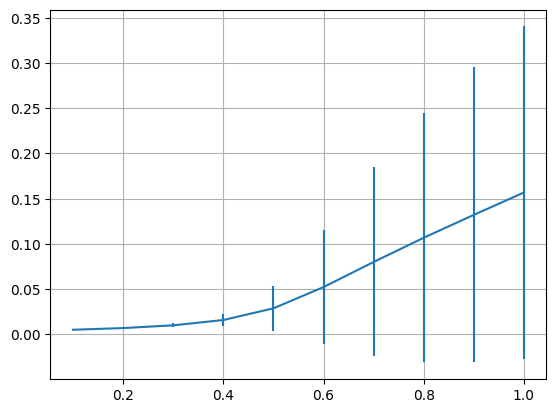

In [9]:
plt.errorbar(conf_250[0].betas, mean_mag2_250, yerr=mag2_err_250)
plt.grid(True)

In [10]:
mean_mag2_500, mag2_err_500 = calc_mean_mag(conf_500)

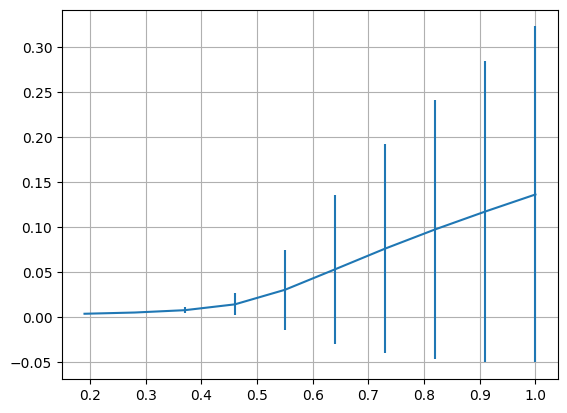

In [11]:
plt.errorbar(conf_500[0].betas, mean_mag2_500, yerr=mag2_err_500)
plt.grid(True)

In [12]:
mean_mag2_1000, mag2_err_1000 = calc_mean_mag(conf_1000)

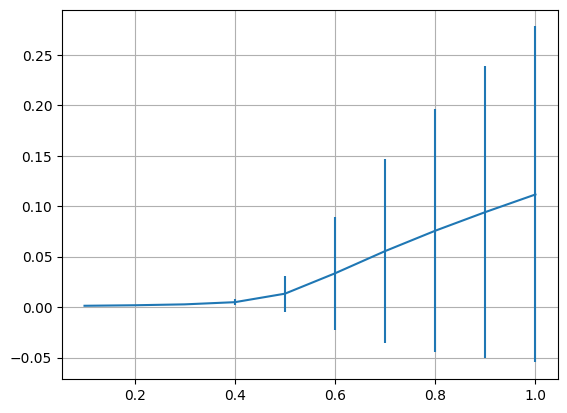

In [13]:
plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000)
plt.grid(True)

In [14]:
mean_mag2_2000, mag2_err_2000 = calc_mean_mag(conf_2000)

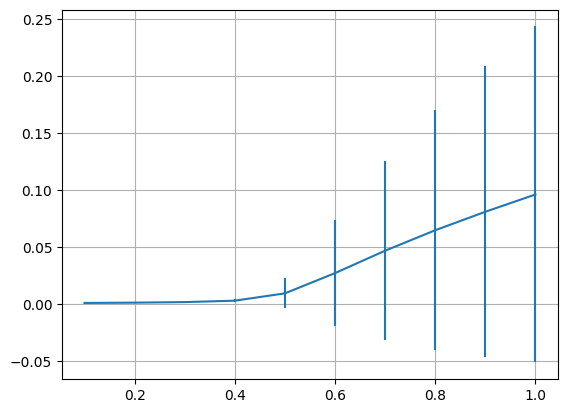

In [15]:
plt.errorbar(conf_2000[0].betas, mean_mag2_2000, yerr=mag2_err_2000)
plt.grid(True)

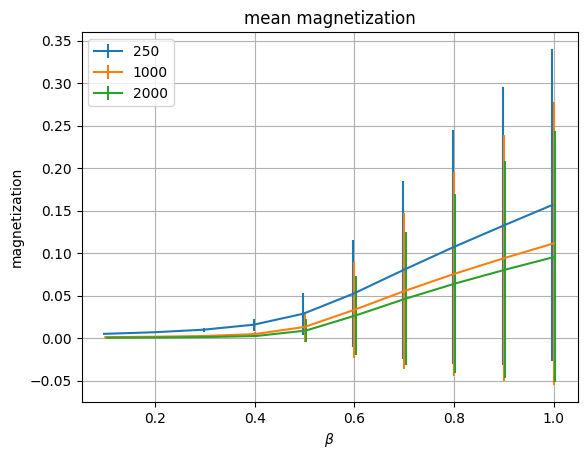

In [16]:
plt.title('mean magnetization')
plt.xlabel(r'$\beta$')
plt.ylabel('magnetization')
plt.errorbar(conf_250[0].betas-0.0025, mean_mag2_250, yerr=mag2_err_250, label='250')
plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000, label='1000')
plt.errorbar(conf_2000[0].betas+0.0025, mean_mag2_2000, yerr=mag2_err_2000, label='2000')
plt.legend(loc='upper left')
plt.grid(True)

In [17]:
U1_L100_confs = load_Conformations_lite_from_dir(r'Conformations/L1000_beta0.1_1_10(1000)')

In [18]:
mean_mag2_U1_L100, mag2_err_U1_L100 = calc_mean_mag(U1_L100_confs)

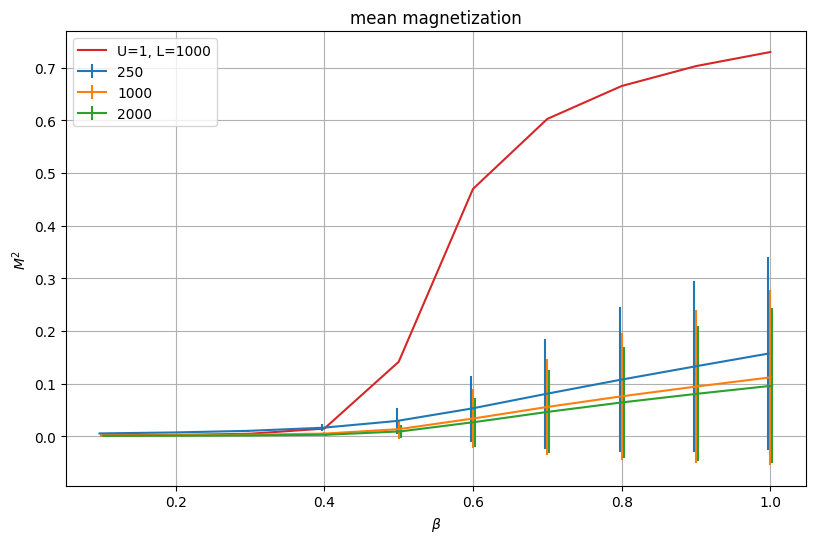

In [19]:
plt.figure(figsize=set_size(345, 1))
plt.xlabel(r'$\beta$')
plt.ylabel(r'$M^2$')
plt.errorbar(conf_250[0].betas-0.0025, mean_mag2_250, yerr=mag2_err_250, label='250')
plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000, label='1000')
plt.errorbar(conf_2000[0].betas+0.0025, mean_mag2_2000, yerr=mag2_err_2000, label='2000')
# plt.errorbar(U1_L100_confs[0].betas, mean_mag2_U1_L100, yerr=mag2_err_U1_L100, label='U=1, L=1000')
plt.plot(U1_L100_confs[0].betas, mean_mag2_U1_L100, label='U=1, L=1000')
plt.legend(loc='upper left')
plt.grid(True)

save_fig(plt.gcf(), 'reports/images/U=0.1_mean_mag2_with_U=1')

fig = plt.gcf()

fig.set_size_inches(set_size(345, 2))
plt.title('mean magnetization')
plt.show()


In [20]:
with matplotlib_pgf():
    plt.figure(figsize=set_size(345))
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$M^2$')
    plt.errorbar(conf_250[0].betas-0.0025, mean_mag2_250, yerr=mag2_err_250, label='250')
    # plt.errorbar(conf_500[0].betas+0.001, mean_mag2_500, yerr=mag2_err_500, label='500')
    plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000, label='1000')
    plt.errorbar(conf_2000[0].betas+0.0025, mean_mag2_2000, yerr=mag2_err_2000, label='2000')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.savefig('reports/images/U=0.1_mean_mag2.pgf', format='pgf', bbox_inches='tight')

In [21]:
with matplotlib_pgf():
    plt.plot([1, 2, 3], [4, 5, 6])
    plt.grid(True)
    plt.savefig('reports/images/test_plot.pgf')

In [22]:
def min_mag_id(confs):
    min_mag = 1.
    min_id = -1
    for i, c in enumerate(confs):
        if c.mag2[-1] < min_mag:
            min_mag = c.mag2[-1]
            min_id = i
    return min_id

/home/roman/Programs/projects/Ising-on-random-conformation/utils.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(struct[:, 0], struct[:, 1], '-g', color='gray')


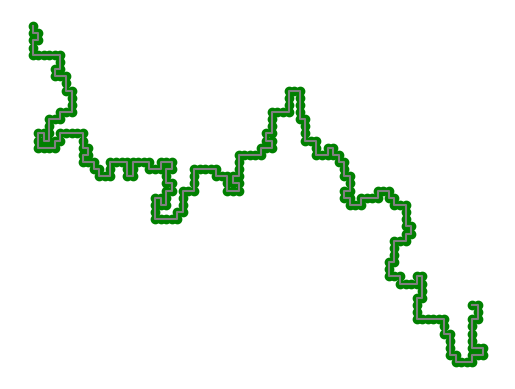

In [23]:
min_id = min_mag_id(conf_250)
min_conf = conf_250[min_id]
draw_conformation(min_conf.struct)

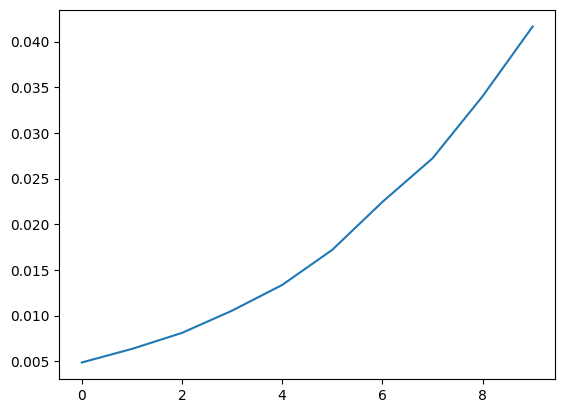

In [24]:
plt.plot(min_conf.mag2)

In [25]:
def max_mag_id(confs):
    max_mag = 0.
    max_id = -1
    for i, c in enumerate(confs):
        if c.mag2[-1] > max_mag:
            max_mag = c.mag2[-1]
            max_id = i
    return max_id

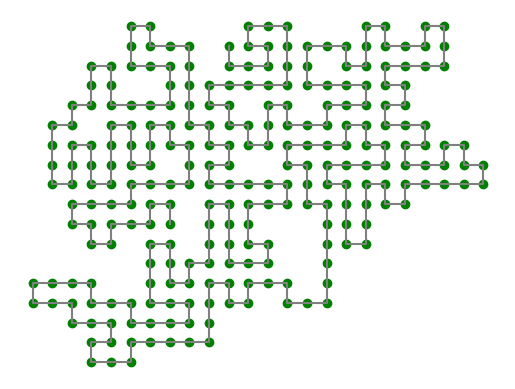

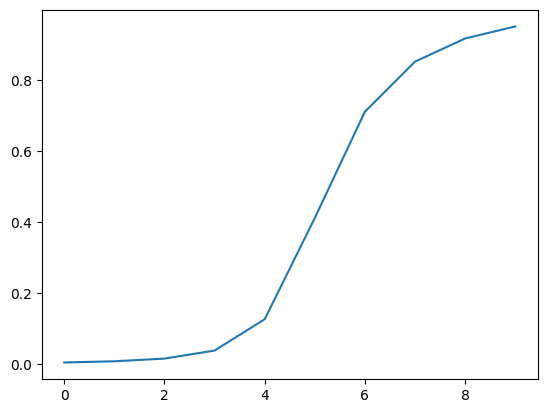

In [26]:
min_id = max_mag_id(conf_250)
min_conf = conf_250[min_id]
draw_conformation(min_conf.struct)
plt.plot(min_conf.mag2);

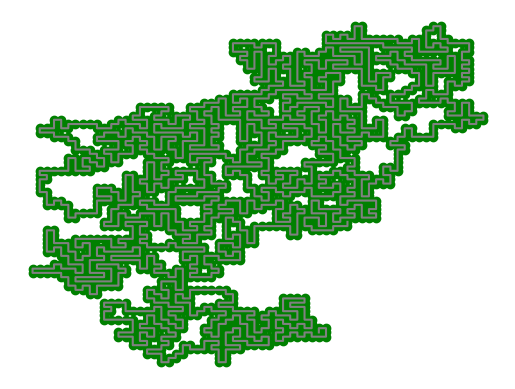

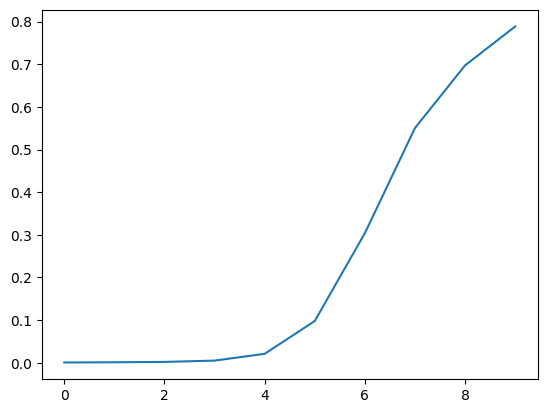

In [27]:
max_id = max_mag_id(conf_2000)
max_conf = conf_2000[max_id]
draw_conformation(max_conf.struct)
plt.plot(max_conf.mag2);

In [28]:
all_confs = [conf_250, conf_500, conf_1000, conf_2000]

4
2
0
0


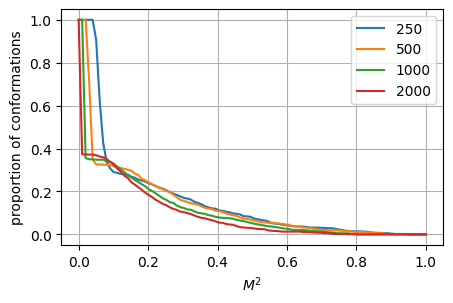

In [29]:
fig = plt.figure(figsize=set_size(345, 0.8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel(r'$M^2$')
ax.set_ylabel('proportion of conformations')
for confs in all_confs:
    mags = np.array([c.mag2[-1] for c in confs])
    print((mags > 0.9).sum())
    x = np.linspace(0, 1, 100)
    y = [(mags > m).sum() / 1000 for m in x]
    ax.plot(x, y, label=f'{confs[0].L-1}')

ax.legend(loc='best')
ax.grid(True)
save_fig(fig, 'reports/images/U=0.1_fraction_of_conformations')
plt.show()

In [30]:
with matplotlib_pgf():
    fig = plt.figure(figsize=set_size(345, 0.8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.grid(True)
    ax.set_xlabel(r'$M^2$')
    ax.set_ylabel('proportion of conformations')
    for confs in all_confs:
        mags = np.array([c.mag2[-1] for c in confs])
        print((mags > 0.9).sum())
        x = np.linspace(0, 1, 100)
        y = [(mags > m).sum() / 1000 for m in x]
        ax.plot(x, y, label=f'{confs[0].L-1}')

    ax.legend(loc='best')
    fig.savefig('reports/images/U=0.1_fraction_of_conformations.pgf', format='pgf', bbox_inches='tight')

4
2
0
0


In [31]:
for confs in all_confs:
    max_id = max_mag_id(confs)
    print(confs[max_id].mag2[-1], confs[max_id].mag2_er[-1])

0.9505014582619606 0.00012673234945157852
0.9478109712729328 7.474273113172889e-05
0.799555671485256 0.00019089702067420127
0.7887153890204026 0.0002706672172920034


# Separating magnetic conformations 
## By cluster size

In [32]:
cnb_250 = clusters_and_bridges_from_list(conf_250)

In [33]:
def select_conf_by_cluster(conformations, threshold=0.8, top=True):
    clasters, _ = clusters_and_bridges_from_list(conformations)
    res = []
    for cl, con in zip(clasters, conformations):
        if cl.shape[0] == 0:
            cmax = 0
        else:
            cmax = cl.max()
        if (cmax / con.L > threshold and top) or (cmax / con.L < threshold and not top):
            res.append(con)
            
    return res

number of seleted conformations: 846


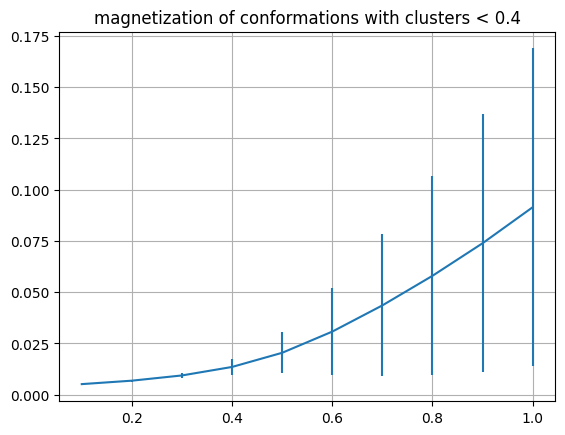

In [34]:
cl_size = 0.4
chose_250 = select_conf_by_cluster(conf_250, cl_size, top=False)
print('number of seleted conformations:', len(chose_250))

mean_mag2_250, mag2_err_250 = calc_mean_mag(chose_250)

plt.title(f'magnetization of conformations with clusters < {cl_size}')
plt.errorbar(conf_250[0].betas, mean_mag2_250, yerr=mag2_err_250)
plt.grid(True)

number of seleted conformations: 21


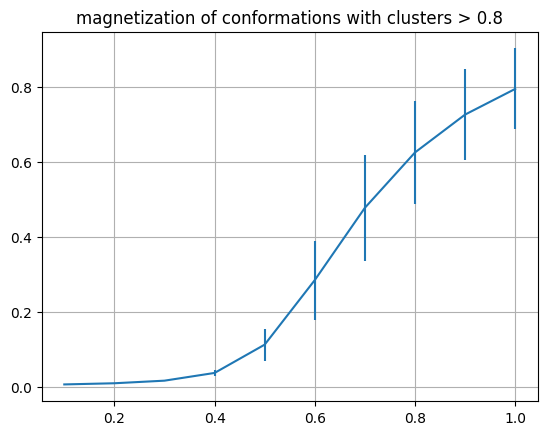

In [35]:
cl_size = 0.8
chose_250 = select_conf_by_cluster(conf_250, cl_size, top=True)
print('number of seleted conformations:', len(chose_250))

mean_mag2_250, mag2_err_250 = calc_mean_mag(chose_250)

plt.title(f'magnetization of conformations with clusters > {cl_size}')
plt.errorbar(conf_250[0].betas, mean_mag2_250, yerr=mag2_err_250)
plt.grid(True)

number of seleted conformations: 2


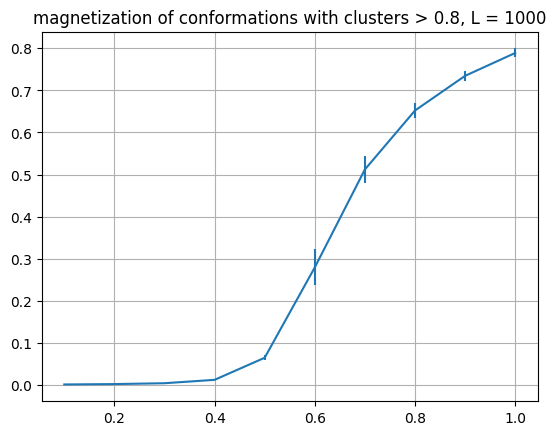

In [36]:
cl_size = 0.8
chose_1000 = select_conf_by_cluster(conf_1000, cl_size, top=True)
print('number of seleted conformations:', len(chose_1000))

mean_mag2_1000, mag2_err_1000 = calc_mean_mag(chose_1000)

plt.title(f'magnetization of conformations with clusters > {cl_size}, L = 1000')
plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000)
plt.grid(True)

## By radius

In [37]:
def select_conf_by_radius(conformations, threshold=0.8, top=True):
    res = []
    for con in conformations:
        if (con.R_norm < threshold and top) or (con.R_norm > threshold and not top):
            res.append(con)
            
    return res

931


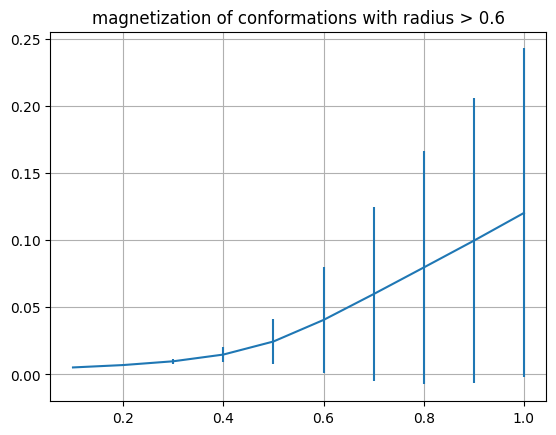

In [38]:
R = 0.6
chose_250 = select_conf_by_radius(conf_250, R, top=False)
print(len(chose_250))

mean_mag2_250, mag2_err_250 = calc_mean_mag(chose_250)

plt.title(f'magnetization of conformations with radius > {R}')
plt.errorbar(conf_250[0].betas, mean_mag2_250, yerr=mag2_err_250)
plt.grid(True)

69


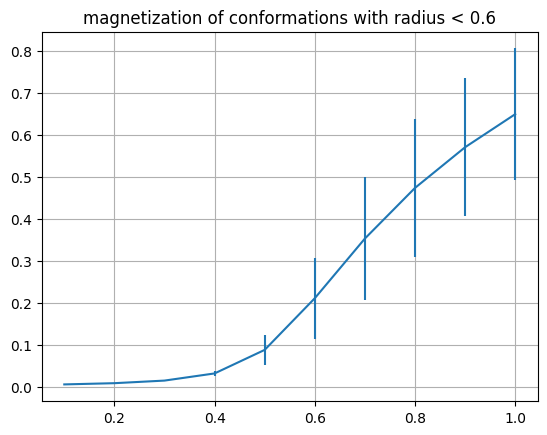

In [39]:
R = 0.6
chose_250 = select_conf_by_radius(conf_250, R, top=True)
print(len(chose_250))
mean_mag2_250, mag2_err_250 = calc_mean_mag(chose_250)

plt.title(f'magnetization of conformations with radius < {R}')
plt.errorbar(conf_250[0].betas, mean_mag2_250, yerr=mag2_err_250)
plt.grid(True)

950


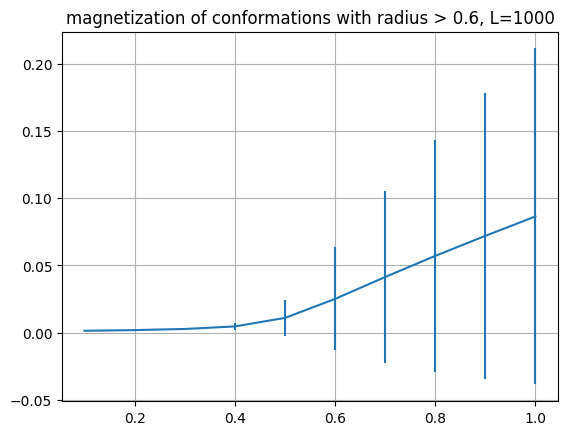

In [40]:
R = 0.6
chose_1000 = select_conf_by_radius(conf_1000, R, top=False)
print(len(chose_1000))

mean_mag2_1000, mag2_err_1000 = calc_mean_mag(chose_1000)

plt.title(f'magnetization of conformations with radius > {R}, L=1000')
plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000)
plt.grid(True)

50


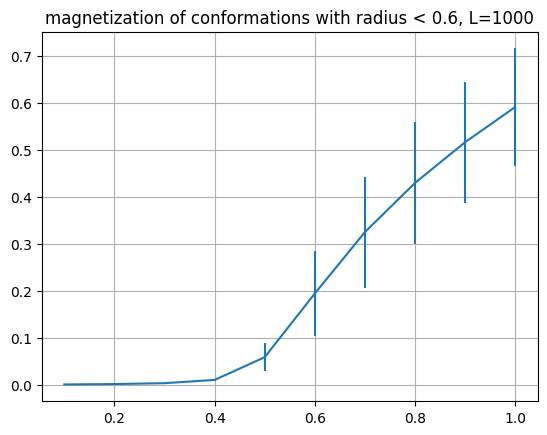

In [41]:
R = 0.6
chose_1000 = select_conf_by_radius(conf_1000, R, top=True)
print(len(chose_1000))

mean_mag2_1000, mag2_err_1000 = calc_mean_mag(chose_1000)

plt.title(f'magnetization of conformations with radius < {R}, L=1000')
plt.errorbar(conf_1000[0].betas, mean_mag2_1000, yerr=mag2_err_1000)
plt.grid(True)

# Magnetic susceptibility

In [42]:
def find_ms_peaks(confs):
    p = []
    for c in confs:
        ms = magnetic_susceptibility(c)
        p.append(np.argmax(ms))
        
    return p

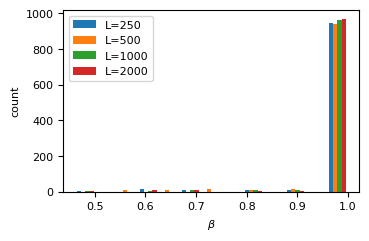

In [43]:

plt.rcParams['font.size'] = '8'
plt.figure(figsize=set_size(fraction=0.8))
plt.title('magnetic susceptibility peaks of 1000 conformations')
plt.xlabel(r'$\beta$')
plt.ylabel('count')
ms_peaks = find_ms_peaks(conf_250)
beta_peaks_250 = conf_250[0].betas[ms_peaks]

ms_peaks = find_ms_peaks(conf_500)
beta_peaks_500 = conf_500[0].betas[ms_peaks]

ms_peaks = find_ms_peaks(conf_1000)
beta_peaks_1000 = conf_1000[0].betas[ms_peaks]

ms_peaks = find_ms_peaks(conf_2000)
beta_peaks_2000 = conf_2000[0].betas[ms_peaks]
beta_peaks = [beta_peaks_250, beta_peaks_500, beta_peaks_1000, beta_peaks_2000]
plt.hist(beta_peaks, bins='auto')
plt.legend(['L=250', 'L=500', 'L=1000', 'L=2000'], loc='best')

save_fig(plt.gcf(), './reports/images/U=0.1_MS_peaks')
plt.show()

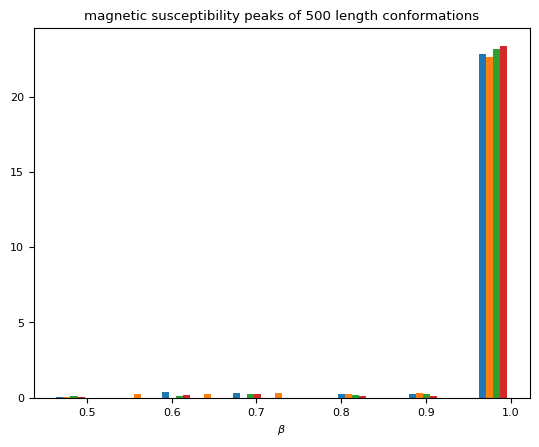

In [44]:

plt.title('magnetic susceptibility peaks of 500 length conformations')
plt.xlabel(r'$\beta$')
plt.hist(beta_peaks, density=True, bins='auto')
plt.show()

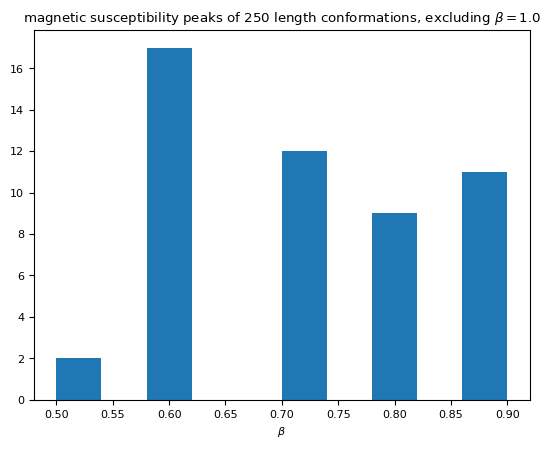

In [45]:
ms_peaks = find_ms_peaks(conf_250)
ms_peaks = [m for m in ms_peaks if m < 9]
beta_peaks = conf_250[0].betas[ms_peaks]
plt.title(r'magnetic susceptibility peaks of 250 length conformations, excluding $\beta = 1.0$')
plt.xlabel(r'$\beta$')
plt.hist(beta_peaks)
plt.show()

In [46]:
def calc_mean_ms(data):
    ms = np.zeros(len(data[0].betas))
    for c in data:
        ms += magnetic_susceptibility(c)
        
    return ms / len(data)

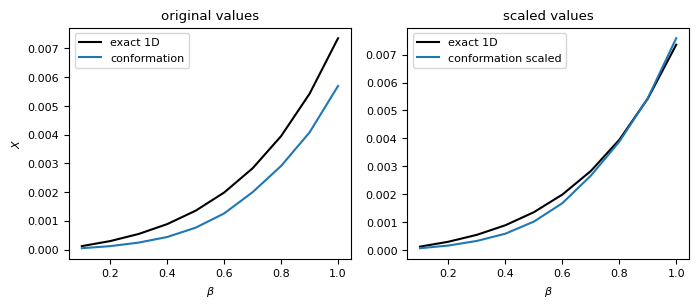

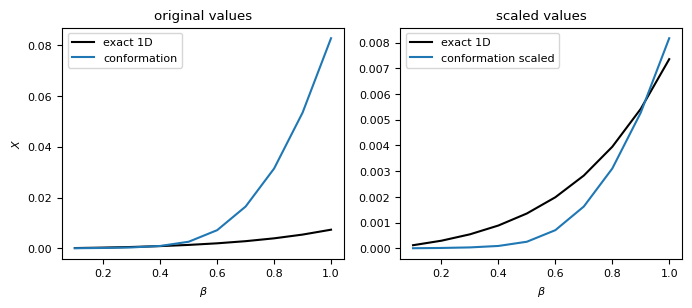

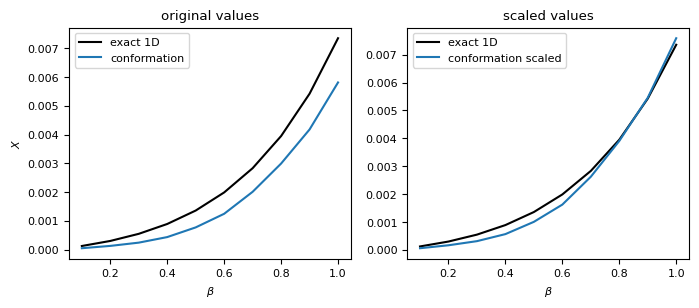

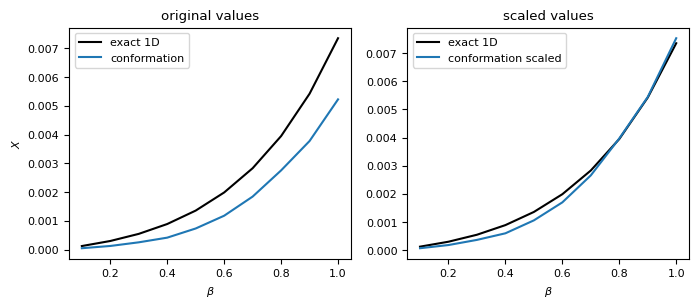

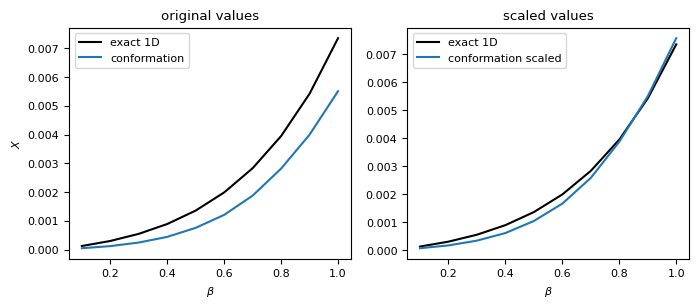

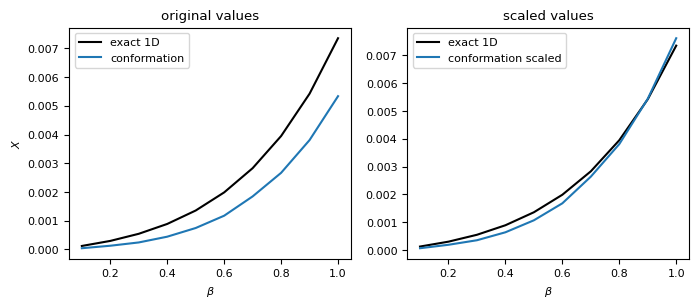

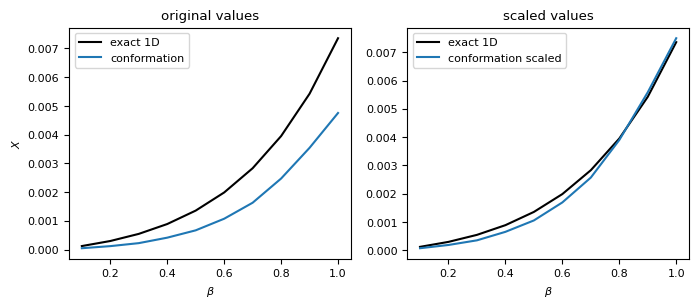

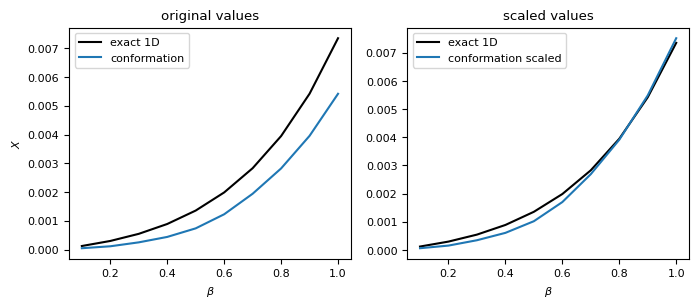

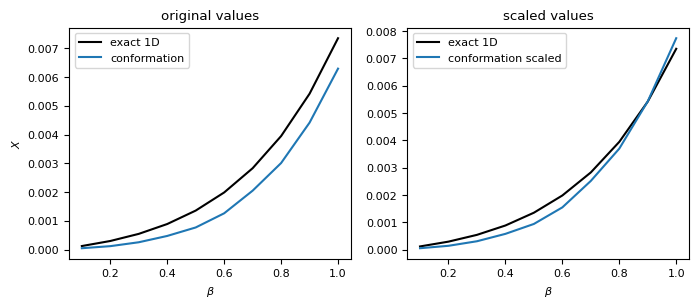

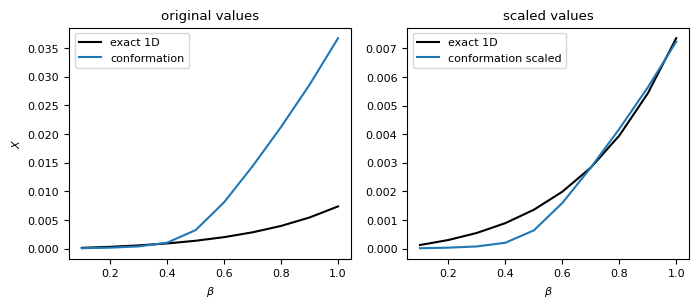

In [47]:
betas = conf_1000[0].betas
true_1D_ms = mag_sus1D(betas, 1001) / 1001**2
for i in range(10, 20):
    c = conf_1000[i]
    ms = magnetic_susceptibility(c)
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax1, ax2 = ax
    ax1.set_xlabel(BETA)
    ax1.set_ylabel(r'$X$')
    ax1.set_title('original values')
    ax1.plot(betas, true_1D_ms, c='black', label='exact 1D')
    ax1.plot(betas, ms, label='conformation')
    ax1.legend(loc='best')
    
    ax2.set_title('scaled values')
#     coef = statistics.mean(true_1D_ms / ms) 
    coef = np.linalg.lstsq(np.array([ms]).T, true_1D_ms, -1)[0][0]
    ms_scaled = ms * coef
    ax2.set_xlabel(BETA)
    ax2.plot(betas, true_1D_ms, c='black', label='exact 1D')
    ax2.plot(betas, ms_scaled, label='conformation scaled')
    ax2.legend(loc='best')
    plt.show()
    

/home/roman/Programs/projects/Ising-on-random-conformation/utils.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(struct[:, 0], struct[:, 1], '-g', color='gray')


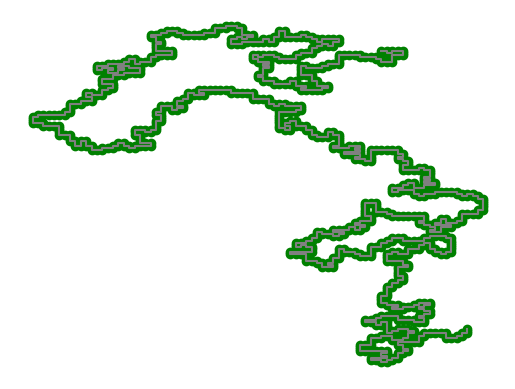

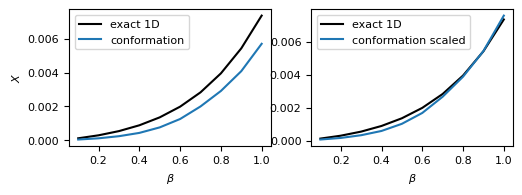

In [48]:
c = conf_1000[10]
draw_conformation(c.struct)
ms = magnetic_susceptibility(c)
plt.rcParams['font.size'] = '8'
fig, ax = plt.subplots(1, 2, figsize=set_size(fraction=1.2, subplots=(1, 2)))
ax1, ax2 = ax
ax1.set_xlabel(BETA)
ax1.set_ylabel(r'$X$')
ax1.set_title('original values')
ax1.plot(betas, true_1D_ms, c='black', label='exact 1D')
ax1.plot(betas, ms, label='conformation')
ax1.legend(loc='best')

ax2.set_title('scaled values')
#     coef = statistics.mean(true_1D_ms / ms) 
coef = np.linalg.lstsq(np.array([ms]).T, true_1D_ms, -1)[0][0]
ms_scaled = ms * coef
ax2.set_xlabel(BETA)
ax2.plot(betas, true_1D_ms, c='black', label='exact 1D')
ax2.plot(betas, ms_scaled, label='conformation scaled')
ax2.legend(loc='best')
save_fig(fig, './reports/images/MS_1D_comparison')
plt.show()

In [49]:
betas = conf_1000[0].betas
true_1D_ms = mag_sus1D(betas, 1001) / 1001**2
errors = []
for c in conf_1000:
    ms = magnetic_susceptibility(c)
    er = np.sqrt(((true_1D_ms-ms) ** 2).sum() / len(betas))
    errors.append(er)

errors = np.array(errors)

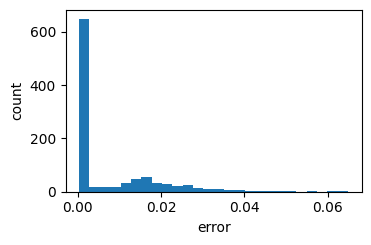

In [50]:
plt.rcParams['font.size'] = '10'
plt.figure(figsize=set_size(fraction=0.8))
plt.title('MSE of the magnetic susceptibility from a 1D chain')
plt.xlabel('error')
plt.ylabel('count')
plt.hist(errors, bins='auto')

save_fig(plt.gcf(), './reports/images/U=0.1_MS_1D_diff_distrib')
plt.show()

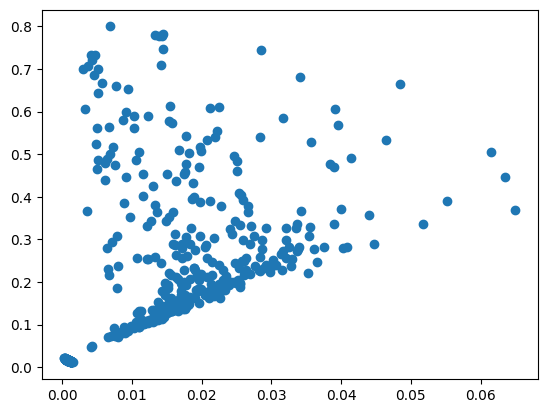

In [51]:
plt.scatter(errors, [c.mag2[-1] for c in conf_1000])

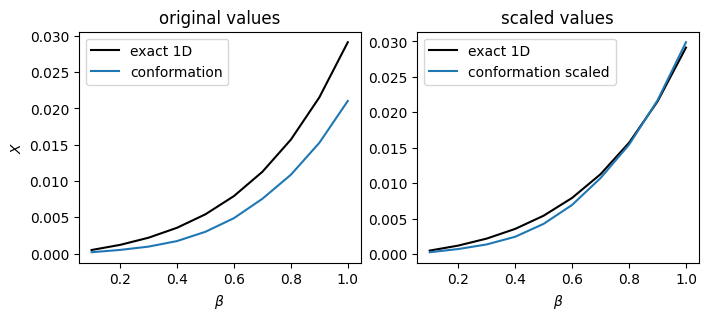

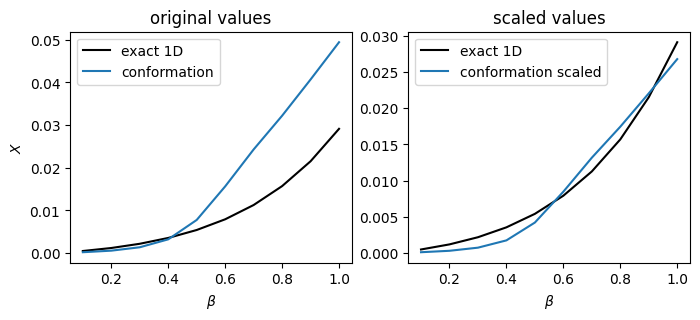

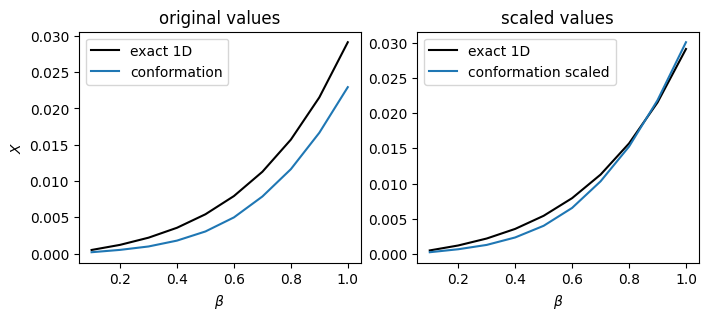

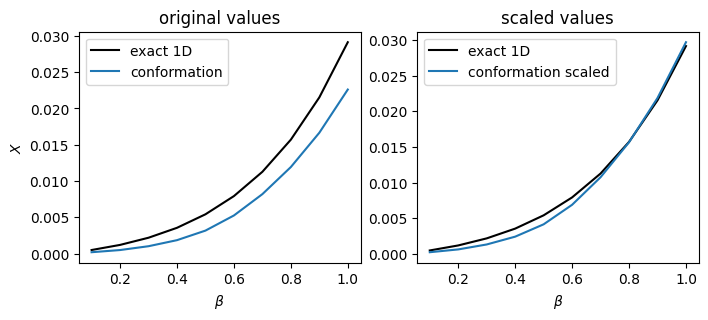

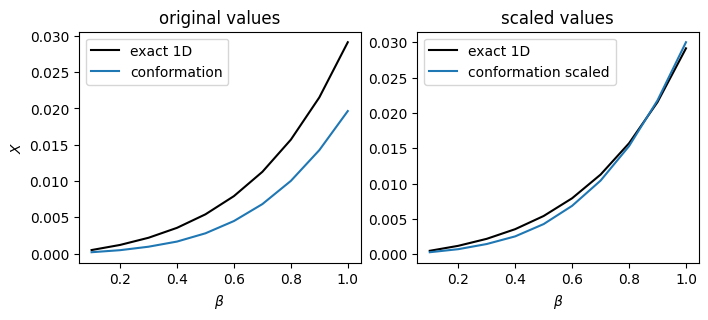

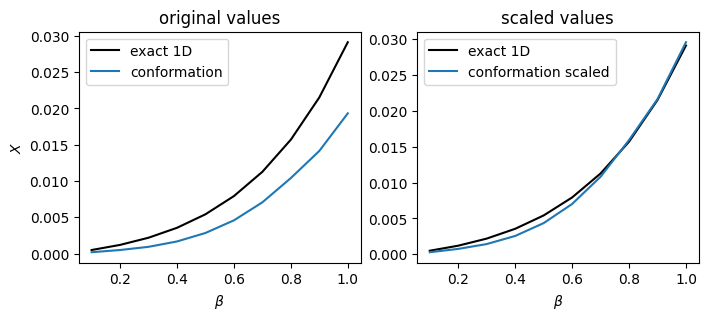

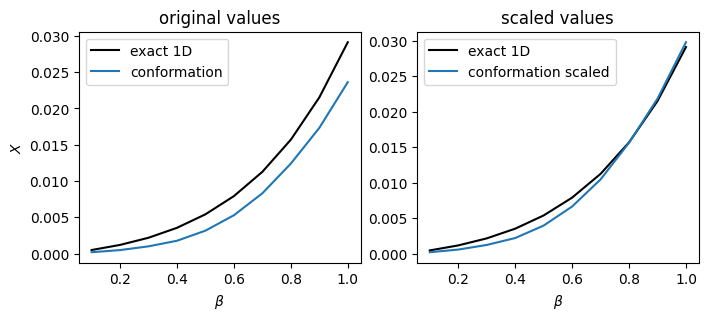

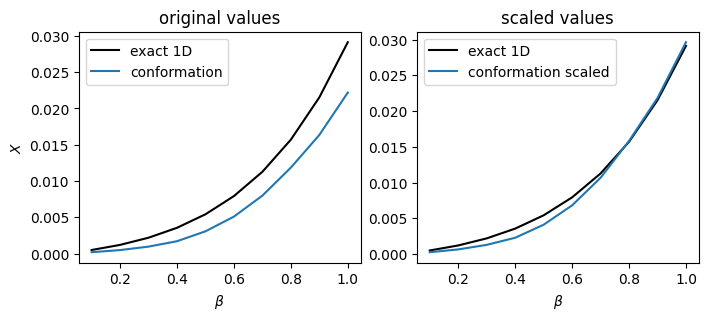

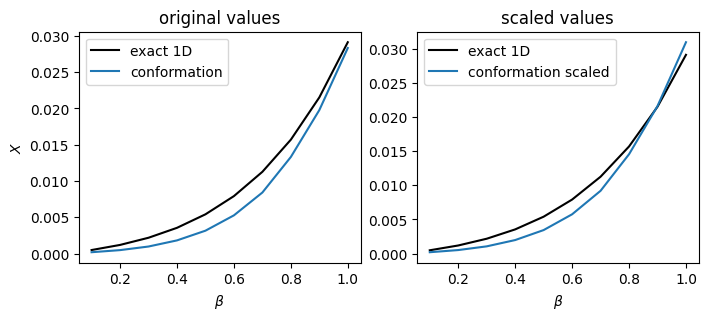

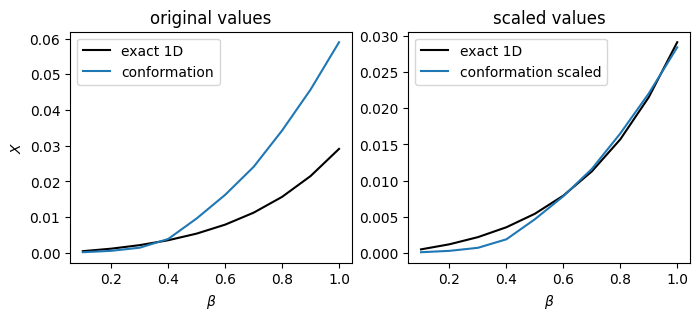

In [52]:
betas = conf_250[0].betas
true_1D_ms = mag_sus1D(betas, 250) / 250**2
for i in range(10, 20):
    c = conf_250[i]
    ms = magnetic_susceptibility(c)
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax1, ax2 = ax
    ax1.set_title('original values')
    ax1.set_xlabel(BETA)
    ax1.set_ylabel(r'$X$')
    ax1.plot(betas, true_1D_ms, c='black', label='exact 1D')
    ax1.plot(betas, ms, label='conformation')
    ax1.legend(loc='best')
    
    ax2.set_title('scaled values')
#     coef = statistics.mean(true_1D_ms / ms)
    coef = np.linalg.lstsq(np.array([ms]).T, true_1D_ms, -1)[0][0]
    ms_scaled = ms * coef
    ax2.set_xlabel(BETA)
    ax2.plot(betas, true_1D_ms, c='black', label='exact 1D')
    ax2.plot(betas, ms_scaled, label='conformation scaled')
    ax2.legend(loc='best')
    plt.show()
    

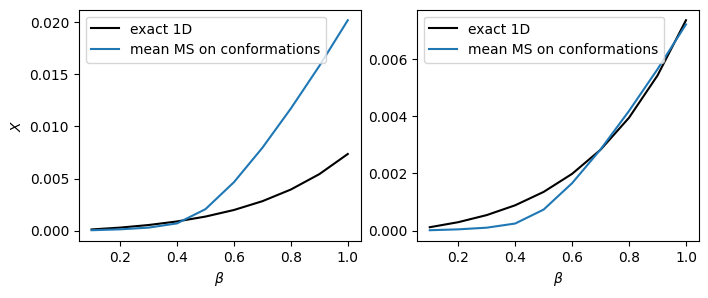

0.35732682521348325


In [53]:
# 1000
betas = conf_1000[0].betas
true_1D_ms = mag_sus1D(betas, 1001) / 1001**2
mean_ms = calc_mean_ms(conf_1000)

ms = mean_ms
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax1, ax2 = ax
ax1.set_xlabel(BETA)
ax1.set_ylabel(r'$X$')
ax1.set_title('original values')
ax1.plot(betas, true_1D_ms, c='black', label='exact 1D')
ax1.plot(betas, ms, label='mean MS on conformations')
ax1.legend(loc='best')

ax2.set_title('scaled values')
#     coef = statistics.mean(true_1D_ms / ms) 
coef = np.linalg.lstsq(np.array([ms]).T, true_1D_ms, -1)[0][0]
ms_scaled = ms * coef
ax2.plot(betas, true_1D_ms, c='black', label='exact 1D')
ax2.plot(betas, ms_scaled, label='mean MS on conformations')
ax2.legend(loc='best')
save_fig(plt.gcf(), './reports/images/U=0.1_ms_with_true_1D')
ax2.set_xlabel(BETA)
plt.show()

print(coef)